In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)

import os
import sys
import pickle
import numpy as np
from scipy.stats import multivariate_normal

In [4]:
dir_data = 'examples/four_lsf/data/GP_conv_comb_w_rep10_0226.pkl'
with open(dir_data, 'rb') as f:
    pf_list = pickle.load(f)

J:\Installation\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
def four_lsf(X, Y):
    """
    Define and evaluate the limit state functions that may be computationally expensive
    Args:
        theta: numpy array_like
            n by d Numpy array where n is the size of points and d is the dimension of each point;

    Returns:
        outputs: numpy array_like
            n by num_lsf where num_lsf is the number of limit state functions
        num_feval: int
            n * num_lsf, number of function evaluations

    """
    y0 = 3 + 0.1 * (X - Y) ** 2 - (X + Y) / 2 ** 0.5
    y1 = 3 + 0.1 * (X - Y) ** 2 + (X + Y) / 2 ** 0.5
    y2 = (X - Y) + 6 / 2 ** 0.5
    y3 = (Y - X) + 6 / 2 ** 0.5
    y_out_all = np.transpose(np.array([y0, y1, y2, y3]))
    y_out_min = np.min(y_out_all, axis=2)
    return y_out_min

In [11]:
X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z_1 = four_lsf(X, Y)
levels_1 = [0]

In [25]:
Z_2 = np.min(pf_list[0]['surrogate'].predict(np.transpose([X.flatten(), Y.flatten()]), False, False), axis=1).reshape((100,100))
levels_2 = [0]

In [20]:
X

array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       ..., 
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]])

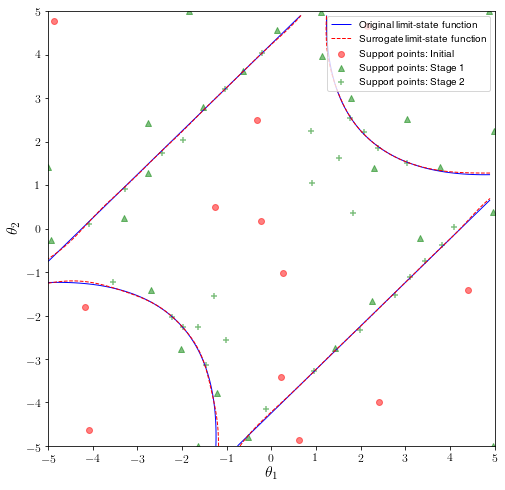

In [41]:
fig = plt.figure(1, figsize=[8, 8])
ax = plt.gca()

lsf = plt.contour(X, Y, Z_1, len(levels_1), colors='b', linewidths=1.0, linestyles='solid',
                 levels=levels_1)
lsf2 = plt.contour(X, Y, Z_2, len(levels_2), colors='r', linewidths=1.0, linestyles='dashed',
                 levels=levels_2)
lsf.collections[0].set_label('Original limit-state function')
lsf2.collections[0].set_label('Surrogate limit-state function')

num_init_pts = pf_list[0]['num_pnt_init']
num_feval_total1 = pf_list[0]['num_feval_total1']
pts1 = plt.scatter(pf_list[0]['X'][0:num_init_pts, 0], pf_list[0]['X'][0:num_init_pts, 1],
                   c='r', alpha=0.5, marker='o', label='Support points: Initial')
pts2 = plt.scatter(pf_list[0]['X'][num_init_pts:num_feval_total1, 0], pf_list[0]['X'][num_init_pts:num_feval_total1, 1],
                   c='g', alpha=0.5, marker='^', label='Support points: Stage 1')
pts2 = plt.scatter(pf_list[0]['X'][num_feval_total1:, 0], pf_list[0]['X'][num_feval_total1:, 1],
                   c='g', alpha=0.5, marker='+', label='Support points: Stage 2')

plt.xlabel(r'\theta_{1}', fontsize=16)
plt.ylabel(r'\theta_{2}', fontsize=16)
plt.legend(loc=1)

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [47]:
fig.savefig('examples/four_lsf/fig.svg', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)

# Example: multimodal

In [50]:
dir_data = 'examples/multimodal_Bichon/data/GP_conv_comb_w_rep10_0227.pkl'
with open(dir_data, 'rb') as f:
    pf_list = pickle.load(f)

J:\Installation\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [54]:
def lsf_multimodal_function(X, Y):
    """
    Define and evaluate the limit state functions that may be computationally expensive
    Args:
        theta: numpy array_like
            n by d Numpy array where n is the size of points and d is the dimension of each point;

    Returns:
        outputs: array-like, shape = (n, d)
            n by num_lsf where num_lsf is the number of limit state functions

    """
    Z = -((X ** 2 + 4) * (Y - 1) / 20 - np.sin(5 * X / 2) - 2)
    return Z

In [56]:
X, Y = np.meshgrid(np.arange(-4, 7, 0.1), np.arange(-3, 9, 0.1))
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z_1 = lsf_multimodal_function(X, Y)
levels_1 = [0]

In [57]:
Z_2 = np.min(pf_list[0]['surrogate'].predict(np.transpose([X.flatten(), Y.flatten()]), False, False), axis=1).reshape(X.shape)
levels_2 = [0]

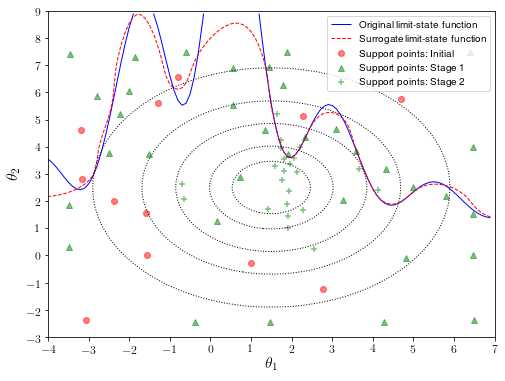

In [68]:
fig = plt.figure(1, figsize=[8, 6])
ax = plt.gca()

lsf = plt.contour(X, Y, Z_1, len(levels_1), colors='b', linewidths=1.0, linestyles='solid',
                 levels=levels_1)
lsf2 = plt.contour(X, Y, Z_2, len(levels_2), colors='r', linewidths=1.0, linestyles='dashed',
                 levels=levels_2)
lsf.collections[0].set_label('Original limit-state function')
lsf2.collections[0].set_label('Surrogate limit-state function')

num_init_pts = pf_list[0]['num_pnt_init']
num_feval_total1 = pf_list[0]['num_feval_total1']
pts1 = plt.scatter(pf_list[0]['X'][0:num_init_pts, 0], pf_list[0]['X'][0:num_init_pts, 1],
                   c='r', alpha=0.5, marker='o', label='Support points: Initial')
pts2 = plt.scatter(pf_list[0]['X'][num_init_pts:num_feval_total1, 0], pf_list[0]['X'][num_init_pts:num_feval_total1, 1],
                   c='g', alpha=0.5, marker='^', label='Support points: Stage 1')
pts2 = plt.scatter(pf_list[0]['X'][num_feval_total1:, 0], pf_list[0]['X'][num_feval_total1:, 1],
                   c='g', alpha=0.5, marker='+', label='Support points: Stage 2')

from scipy.stats import multivariate_normal
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = multivariate_normal([1.5, 2.5]).pdf(pos)
levels = [0.00001, 0.001, 0.01, 0.05, 0.1]
cs = plt.contour(X, Y, Z, len(levels), colors='k', linewidths=1, linestyles='dotted', 
                levels=levels)

plt.xlabel(r'\theta_{1}', fontsize=16)
plt.ylabel(r'\theta_{2}', fontsize=16)
plt.legend(loc=1)

ax.set_xlim([-4, 7])
ax.set_ylim([-3, 9])
ax.set_xticks(np.arange(-4, 8, 1))
ax.set_yticks(np.arange(-3, 10, 1))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [69]:
fig.savefig('examples/four_lsf/multimodal.svg', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)